<a href="https://colab.research.google.com/github/dikshantranjan9827/Patient-Clustering/blob/main/Patient_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Overview**

This project focuses on the use of unsupervised learning techniques to find meaningful patterns in a medical (patient) dataset. The primary goal is to segment or cluster patients based on their medical and demographic features, revealing subgroups with distinct profiles that could be useful for healthcare analytics, risk stratification, or targeted interventions. The core techniques involve data preprocessing, dimensionality reduction using PCA, and clustering using K-Means (including elbow and silhouette analysis for validation).

#Importing important libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT The Dataset

In [ ]:
data = pd.read_csv('patient_dataset.csv')

***Data Preparation and Exploration***

**Data Cleaning:**
  The dataset contains mixed data types and missing values. Cleaning steps would include handling nulls, encoding categorical features (such as 'gender', 'smoking_status'), and normalizing numerical features so that all variables contribute equally to clustering.

**Exploratory Data Analysis (EDA):** Use of heatmaps, pair plots, and summary statistics to understand the distributions, correlations, potential outliers, and the overall structure of the data before modeling.

In [ ]:
print(data.isnull().sum())
data.dropna(inplace=True)

age                    0
gender               472
chest_pain_type        0
blood_pressure         0
cholesterol            0
max_heart_rate         0
exercise_angina        0
plasma_glucose       609
skin_thickness       614
insulin              568
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
residence_type       455
smoking_status         0
dtype: int64


In [ ]:
num_cols = data.select_dtypes(include=np.number).columns

imputer = SimpleImputer(strategy='median')
data[num_cols] = imputer.fit_transform(data[num_cols])

In [ ]:
for col in ['gender', 'residence_type', 'smoking_status']:
    if data[col].dtype == 'object' or data[col].isnull().any():
        data[col].fillna('Unknown', inplace=True)
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

/tmp/ipython-input-1711071841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-1711071841.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
features = num_cols.tolist() + ['gender', 'residence_type', 'smoking_status']
X = data[features]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

***Dimensionality Reduction (PCA)***

**Principal Component Analysis (PCA):** PCA is used to reduce the dimensionality of the dataset while preserving as much variance as possible. By transforming original features into principal components, it simplifies cluster analysis and visualization, especially when the number of original features is large. Reducing to 2 or 3 principal components makes it easier to plot and visually interpret cluster structure.

In [ ]:
pca = PCA(n_components=0.90)  # Keep 90% variance
X_pca = pca.fit_transform(X_scaled)

***K-Means Clustering:***

The main clustering method used in the project. K-Means clusters data by minimizing the sum of squared distances between points and their assigned cluster center.K-Means is an unsupervised algorithm that partitions data into K groups by minimizing intra-cluster variance

In [ ]:
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

 Elbow Method Plot

Plots the Within-Cluster Sum of Squares (WCSS) for different values of K (number of clusters).

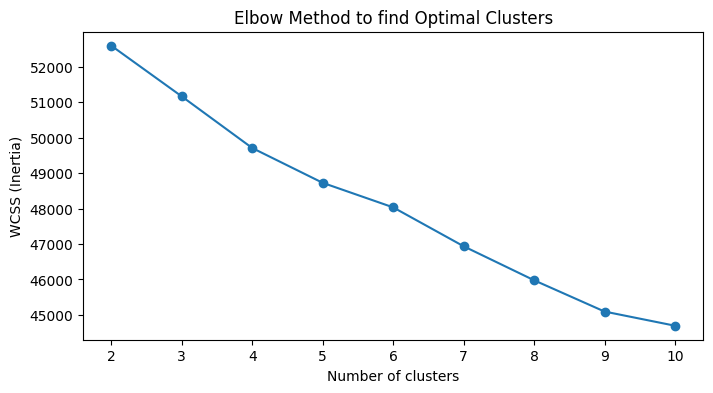

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(range(2,11), wcss, marker='o')
plt.title('Elbow Method to find Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

In [ ]:
optimal_k = 4
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans_final.fit_predict(X_pca)

The **silhouette score** is a metric used to evaluate how well data points have been clustered, quantifying both the cohesion within clusters and the separation between clusters.The silhouette score quantifies how well a data point fits into its assigned cluster versus the nearest other cluster.Score ranges from -1 (bad clustering) to +1 (well-clustered). Values near 0 suggest overlapping clusters or uncertainty; high scores mean good, distinct clustering.

**DBS(Davies-Bouldin Score)** is another cluster validation metric, measuring average similarity between each cluster and the one most similar to it .

Lower DBS indicates better clustering, as clusters are more distinct and internally coherent.

In [ ]:
sil_score = silhouette_score(X_pca, labels)
db_score = davies_bouldin_score(X_pca, labels)
print(f'Silhouette Score: {sil_score:.3f}')
print(f'Davies-Bouldin Index: {db_score:.3f}')

Silhouette Score: 0.054
Davies-Bouldin Index: 4.114


Explained Variance Plot

Shows how much variance each principal component explains.

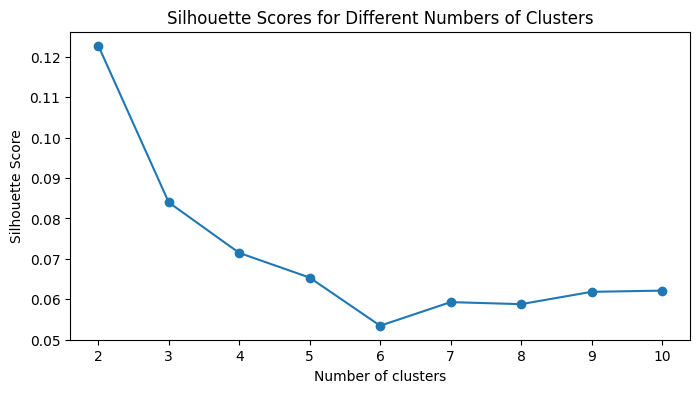

In [ ]:
# Calculate Silhouette Scores for a range of cluster numbers (2 to 10)
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# 2. Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
data['cluster'] = labels

PCA Scatter Plot

A 2D or 3D scatter plot of patients' data points projected onto the first two/three principal components.

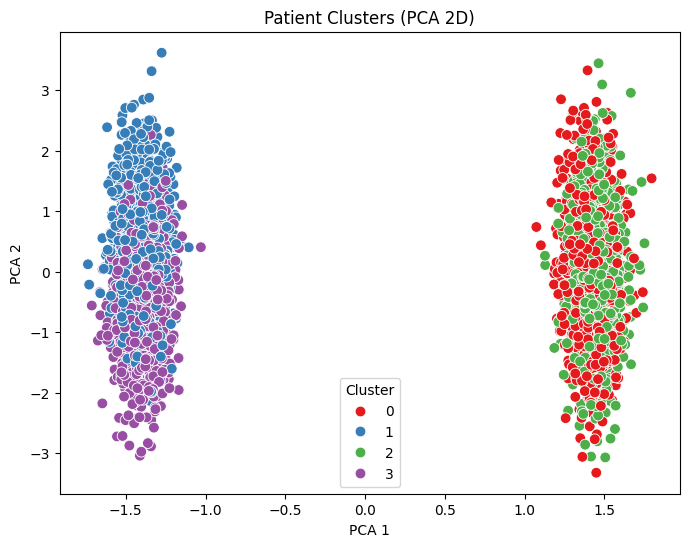

In [ ]:
#  PCA 2D Scatter plot colored by cluster
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='Set1', s=60)
plt.title('Patient Clusters (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

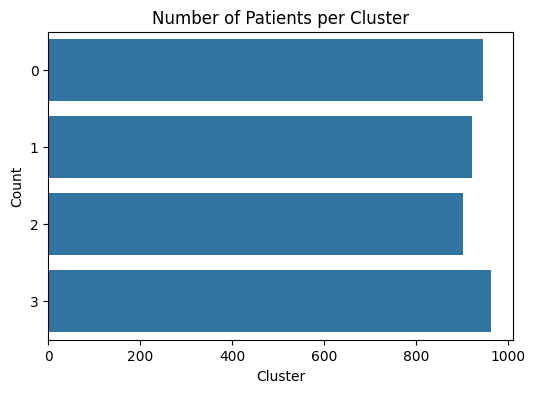

In [ ]:
# 2. Cluster count bar chart
plt.figure(figsize=(6,4))
sns.countplot(data['cluster'].astype(str)) # Convert cluster to string for proper display
plt.title('Number of Patients per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

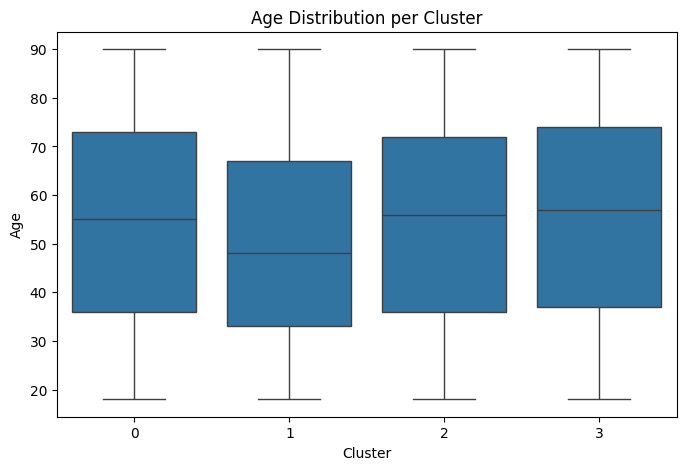

In [ ]:
# 3. Boxplot of age distribution by cluster
plt.figure(figsize=(8,5))
sns.boxplot(x='cluster', y='age', data=data)
plt.title('Age Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

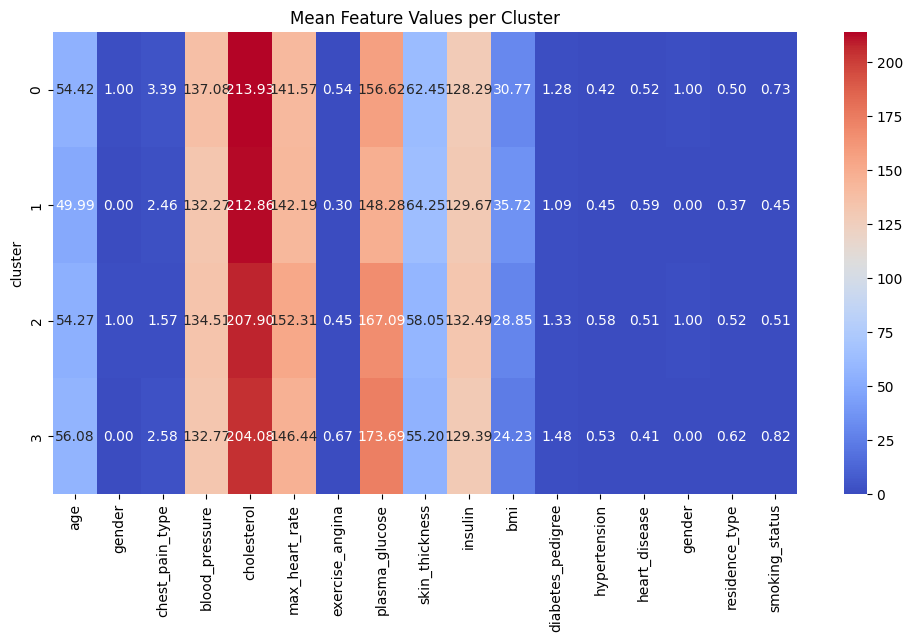

In [ ]:
# 4. Heatmap of mean feature values per cluster
cluster_means = data.groupby('cluster')[features].mean()
plt.figure(figsize=(12,6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mean Feature Values per Cluster')
plt.show()

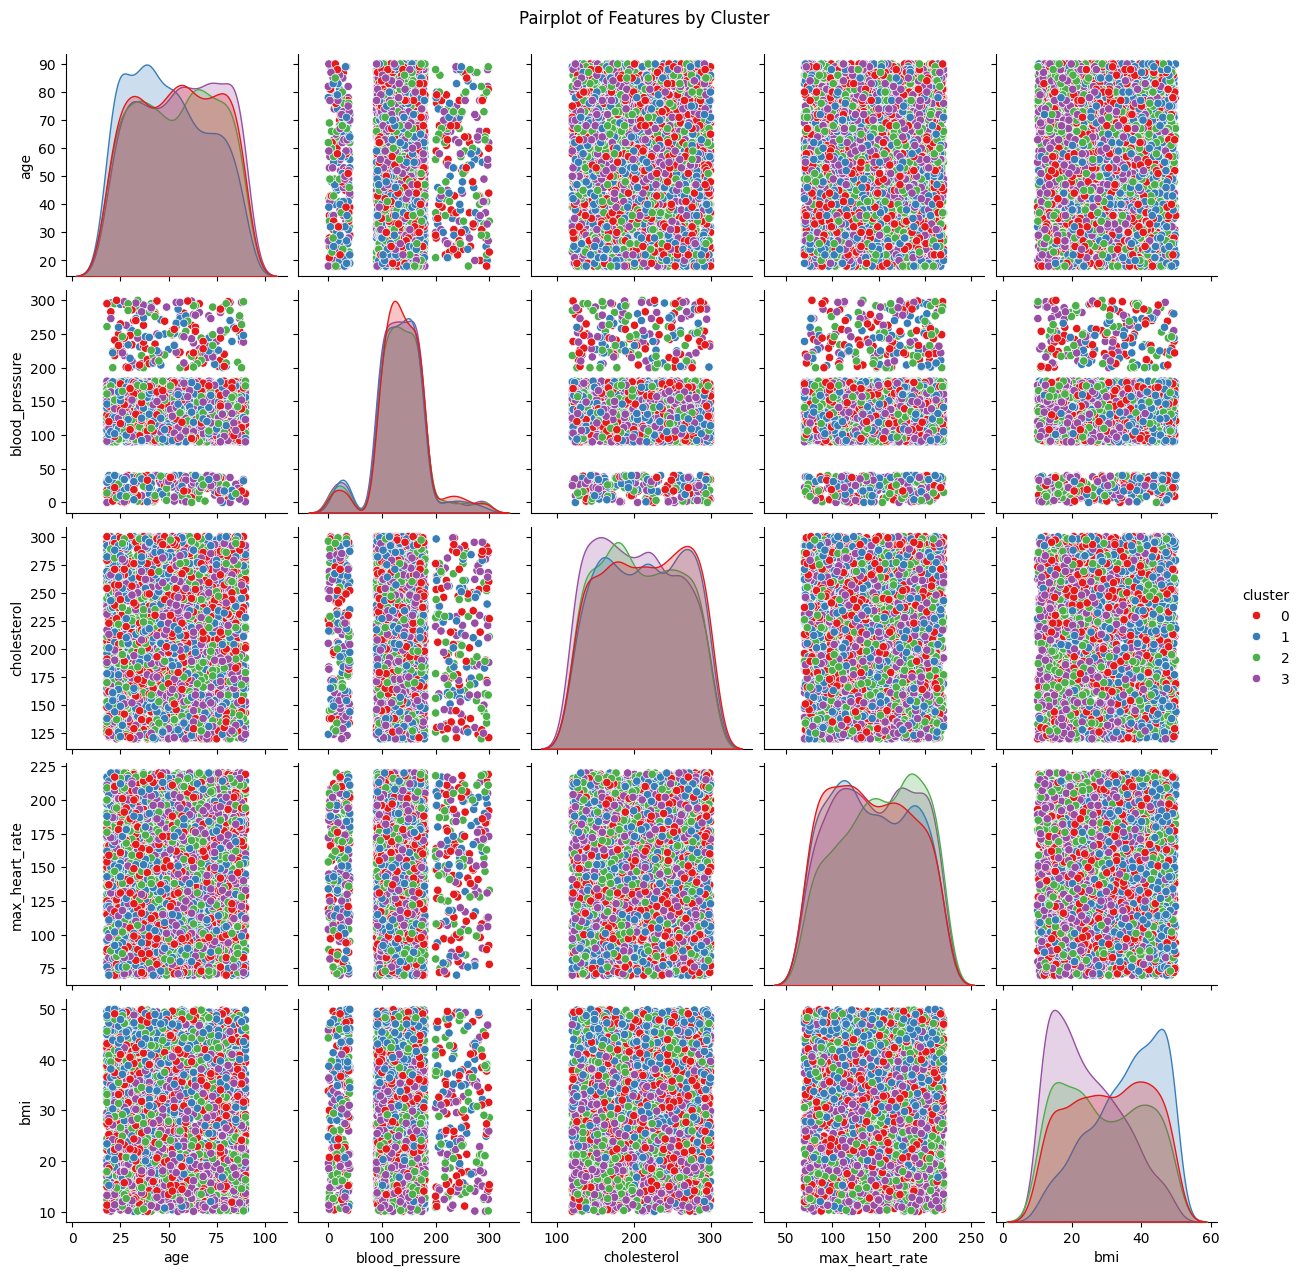

In [ ]:
# 5. Pairplot of selected features colored by cluster
selected_features = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'bmi', 'cluster']
sns.pairplot(data[selected_features], hue='cluster', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Features by Cluster', y=1.02)
plt.show()

**Reasoning**:
Create box plots for key numerical features to visually compare their distributions across clusters.



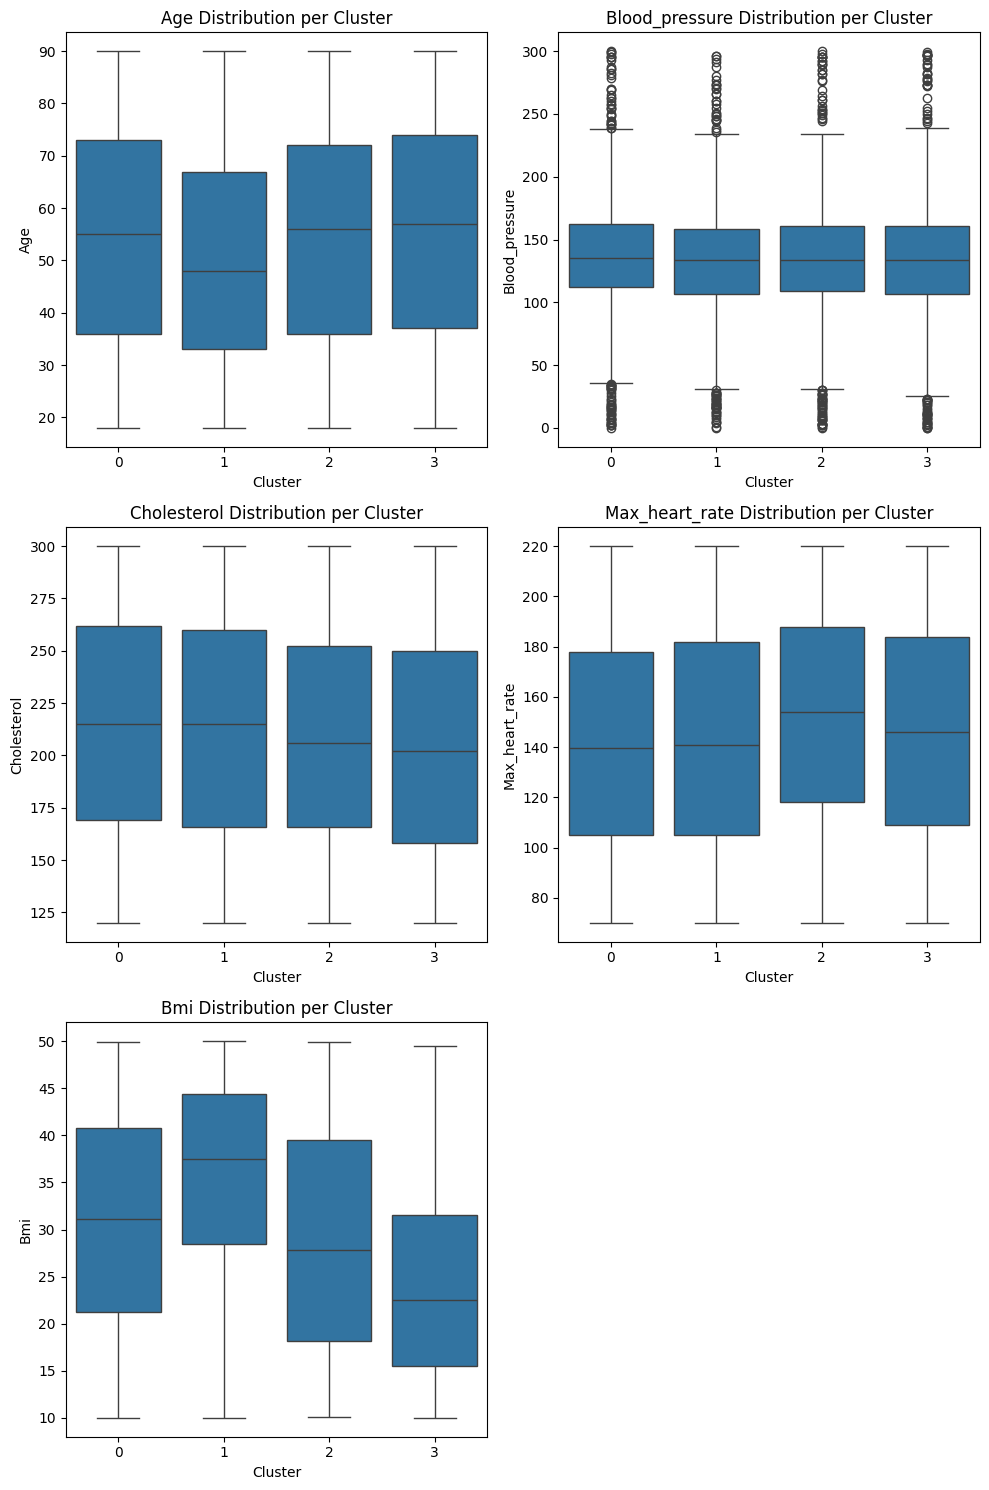

In [ ]:
# Create visualizations (e.g., box plots) for key original features to compare distributions across clusters.
numerical_features_to_plot = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'bmi']
n_plots = len(numerical_features_to_plot)
n_cols = 2
n_rows = (n_plots + n_cols - 1) // n_cols
plt.figure(figsize=(10, n_rows * 5))

for i, col in enumerate(numerical_features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='cluster', y=col, data=data)
    plt.title(f'{col.capitalize()} Distribution per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col.capitalize())

plt.tight_layout()
plt.show()

**CONCLUSION:**

The attached files summarize key unsupervised ML workflows and real-world project templates. For clustering projects, consistently use structured phases: define the problem, clean and preprocess data, apply dimensionality reduction (PCA/t-SNE), experiment with clustering methods (K-means, hierarchical), evaluate with elbow/silhouette, tune with GridSearchCV, visualize clusters, and finally derive practical recommendations. If designing a healthcare clustering project like “Patient Clustering,” always prioritize data standardization, PCA for dimension reduction, validating clusters for interpretability, and profiling for actionable groups